In [1]:
# proj3.ipynb
# Deep Learning and SVM on Mushroom Dataset

# Step 1: Import Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
import joblib

In [3]:
# Step 2: Load Dataset
# Set Paths
data_dir = 'Mushrooms'  # CHANGE THIS TO YOUR DATASET PATH
classes = ['Agaricus', 'Amanita', 'Boletus', 'Cortinarius','Entoloma','Hygrocybe','Lactarius', 'Russula', 'Suillus']

img_height, img_width = 160, 160

images = []
labels = []
for label in classes:
    folder = os.path.join(data_dir, label)
    for img_file in os.listdir(folder):
        img_path = os.path.join(folder, img_file)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (img_width, img_height))
            images.append(img)
            labels.append(label)

images = np.array(images) / 255.0
labels = np.array(labels)

# Encode labels
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

In [4]:
# Step 3: Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
)

datagen.fit(X_train)

In [5]:
# Step 4: Build Classification Model (Softmax)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model_softmax = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')
])

model_softmax.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_softmax.summary()

C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 92416)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,829,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,849,929 (45.20 MB)

 Trainable params: 11,849,929 (45.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Step 5: Train Classification Model
history = model_softmax.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 60s 355ms/step - accuracy: 0.2391 - loss: 2.0309 - val_accuracy: 0.2800 - val_loss: 1.9272
Epoch 2/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 59s 350ms/step - accuracy: 0.2934 - loss: 1.9182 - val_accuracy: 0.3090 - val_loss: 1.8305
Epoch 3/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 58s 347ms/step - accuracy: 0.3257 - loss: 1.8523 - val_accuracy: 0.3567 - val_loss: 1.7609
Epoch 4/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 59s 350ms/step - accuracy: 0.3243 - loss: 1.8383 - val_accuracy: 0.3485 - val_loss: 1.7371
Epoch 5/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 63s 377ms/step - accuracy: 0.3247 - loss: 1.8145 - val_accuracy: 0.3663 - val_loss: 1.6759
Epoch 6/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 59s 351ms/step - accuracy: 0.3561 - loss: 1.7839 - val_accuracy: 0.3931 - val_loss: 1.6330
Epoch 7/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 59s 353ms/step - accuracy: 0.3843 - loss: 1.7295 - val_accuracy: 0.3663 - val_loss: 1.7582
Epoch 8/10
168/168 ━━━━━━━━━━━━━━━━━━━━ 59s 352ms/step - accuracy: 0.3772 - loss: 1

In [8]:
# Step 6: Save Classification Model
model_softmax.save('classification_model.h5')

In [9]:
# Step 7: Build Feature Extraction Model
model_feature = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu')
])

model_feature.compile(optimizer='adam', loss='mse')

model_feature.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 92416)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,829,376 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,848,768 (45.20 MB)

 Trainable params: 11,848,768 (45.20 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Step 8: Train Feature Extraction Model (Same labels)
model_feature.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=30)

Epoch 1/30


InvalidArgumentError: Graph execution error:

Detected at node gradient_tape/compile_loss/mse/sub/BroadcastGradientArgs defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel_launcher.py", line 18, in <module>

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 608, in run_forever

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\base_events.py", line 1936, in _run_once

  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\asyncio\events.py", line 84, in _run

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 545, in dispatch_queue

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 534, in process_one

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 362, in execute_request

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\kernelbase.py", line 778, in execute_request

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\ipkernel.py", line 449, in do_execute

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3075, in run_cell

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3130, in _run_cell

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\async_helpers.py", line 128, in _pseudo_sync_runner

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3334, in run_cell_async

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3517, in run_ast_nodes

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code

  File "C:\Users\Dhruv\AppData\Local\Temp\ipykernel_18892\2771654460.py", line 2, in <module>

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\Dhruv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\backend\tensorflow\trainer.py", line 70, in train_step

Incompatible shapes: [32] vs. [32,128]
	 [[{{node gradient_tape/compile_loss/mse/sub/BroadcastGradientArgs}}]] [Op:__inference_one_step_on_iterator_28845]

In [11]:
# Step 9: Extract Features
X_train_features = model_feature.predict(X_train)
X_val_features = model_feature.predict(X_val)

168/168 ━━━━━━━━━━━━━━━━━━━━ 12s 69ms/step
42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


In [12]:
# Step 10: Train SVM Classifier
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(X_train_features, y_train)

SVC(kernel='linear', probability=True)

In [13]:
# Step 11: Save Feature Extractor and SVM
model_feature.save('feature_extractor_model.h5')
joblib.dump(svm_classifier, 'svm_classifier.pkl')

['svm_classifier.pkl']

In [14]:
# Step 12: Evaluate SVM
svm_accuracy = svm_classifier.score(X_val_features, y_val)
print(f"SVM Validation Accuracy: {svm_accuracy*100:.2f}%")

SVM Validation Accuracy: 26.06%


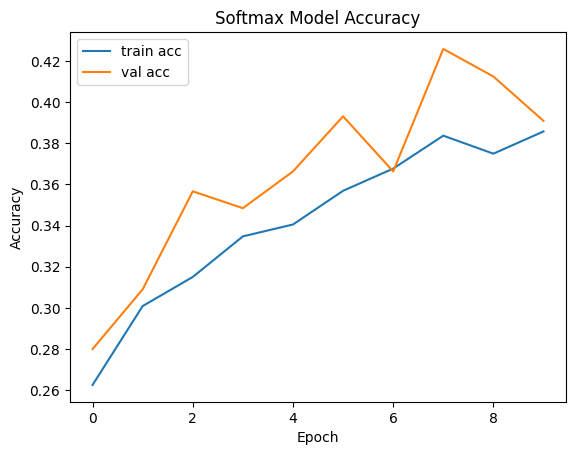

In [15]:
# Step 13: Plot Classification Model Accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Softmax Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()